1. Read Test Data
2. For each timeslice:
    2.1 For each DOM check if time diff < 10ns

In [143]:
import pandas as pd
import numpy as np
import os
import random
from random import shuffle
import shutil

In [177]:
NOISE_PATH = "../../data/ensemble/xyt/meshes/0/train/"
EVENTS_PATH = "../../data/ensemble/xyt/meshes/1/test/"
DATA_PATH = "../../data/time_data.csv"

columns = ["pmt_id",
           "dir_x",
           "dir_y",
           "dir_z",
           "tot"]

In [178]:
df = pd.read_csv(DATA_PATH)
df = df.drop(columns, axis=1)

In [179]:
noise_files = [file for file in os.listdir(NOISE_PATH) if file.endswith(".off")]
event_files = [file for file in os.listdir(EVENTS_PATH) if file.endswith(".off")]

In [180]:
noise_files = [int(file.split("_")[1]) for file in noise_files]
event_files = [int(file.split("_")[1]) for file in event_files]

In [181]:
noise_df = df[df.group.isin(noise_files)]
event_df = df[df.group.isin(event_files)]

In [182]:
noise_df = noise_df.sort_values(by=['group', 'dom_id'])

In [183]:
noise_diff = noise_df.groupby(['group','dom_id']).diff()

In [245]:
incorrect_noise = noise_diff[noise_diff.time < 10]

In [246]:
tagged_noise = noise_df[noise_df.index.isin(incorrect_noise.index)]

In [251]:
tagged_noise = tagged_noise.groupby(['group', 'dom_id']).count().sort_values('time', ascending=False)[:20]

In [252]:
tagged_noise.reset_index().group.unique()

array([   0, 3968,  208,  788])

# Event

In [272]:
event_df = event_df.sort_values(by=['group', 'dom_id'])

In [273]:
event_diff = event_df.groupby(['group','dom_id']).diff()

In [274]:
correct_events = event_diff[event_diff.time < 10]
correct_events  = event_df[event_df.index.isin(correct_events.index)]

In [283]:
correct_events

pos_x  pos_y  pos_z  time  label
group dom_id                                  
394   13.0        1      1      1     1      1
3287  1614.0      1      1      1     1      1
      1625.0      1      1      1     1      1
      1626.0      1      1      1     1      1
      1663.0      1      1      1     1      1
...             ...    ...    ...   ...    ...
3025  410.0       3      3      3     3      3
1488  1428.0      3      3      3     3      3
1869  1570.0      3      3      3     3      3
1637  551.0       3      3      3     3      3
639   1199.0      3      3      3     3      3

[4000 rows x 5 columns]

In [285]:
correct_events = correct_events.groupby(['group', 'dom_id']).count().sort_values('time')[:3000]

In [286]:
correct_events

pos_x  pos_y  pos_z  time  label
group dom_id                                  
394   13.0        1      1      1     1      1
4460  1553.0      1      1      1     1      1
      1566.0      1      1      1     1      1
      1568.0      1      1      1     1      1
      1590.0      1      1      1     1      1
...             ...    ...    ...   ...    ...
1141  336.0       1      1      1     1      1
      337.0       1      1      1     1      1
      284.0       1      1      1     1      1
1516  1624.0      1      1      1     1      1
      1625.0      1      1      1     1      1

[3000 rows x 5 columns]

In [287]:
len(correct_events.reset_index().group.unique())

31

In [288]:
len(event_df.group.unique())

40

In [313]:
from sklearn.metrics import confusion_matrix

y_actu = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0], name='Actual')

y_pred = pd.Series([1, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 0, 0, 0, 0, 0, 0,
                    0, 1, 0, 0, 0, 0, 1, 0, 0,
                    0, 1, 0, 0, 0, 0, 0, 0, 0], name='Predicted')

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'])

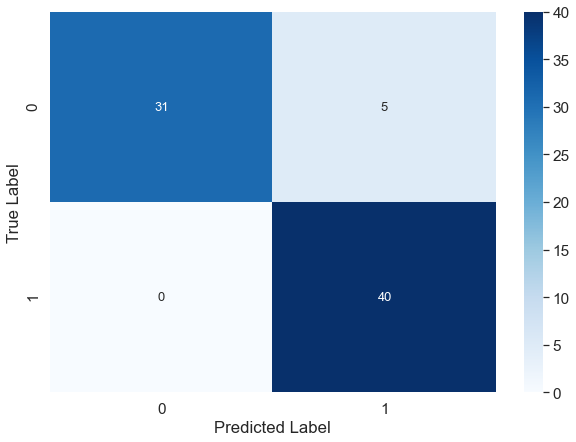

In [327]:
import matplotlib.pyplot as plt

array = [[31, 5],
         [0 , 40]]

df_cm = pd.DataFrame(array, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm,cmap=plt.cm.Blues, annot=True, annot_kws={"size": 13}) # font size
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("../../assets/L1_results.pdf", dpi=600, bbox_inches="tight")

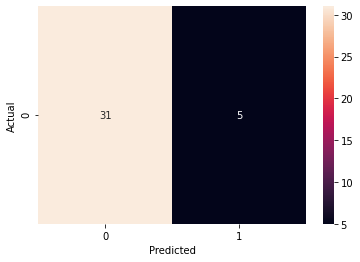

In [315]:
import seaborn as sns
sns.heatmap(df_confusion, annot=True)

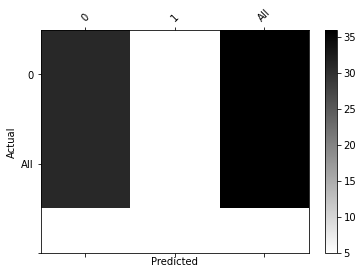

In [310]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

# Test

In [104]:
noise_df

,dom_id,pos_x,pos_y,pos_z,time,label,group
3002369,1.0,-75.097,101.635,196.389,6556668.0,0,437
3006091,1.0,-75.027,101.470,196.559,6564708.0,0,437
3007988,1.0,-75.014,101.779,196.389,6568821.0,0,437
3002057,2.0,-74.766,101.539,187.041,6556027.0,0,437
3004356,2.0,-74.931,101.801,187.211,6561079.0,0,437
...,...,...,...,...,...,...,...
41069028,2069.0,76.652,-76.955,47.359,89739999.0,0,5982
41071042,2069.0,76.748,-76.954,47.411,89744350.0,0,5982
41067749,2070.0,76.748,-77.120,37.700,89737293.0,0,5982
41067816,2070.0,76.656,-77.067,37.731,89737480.0,0,5982


In [110]:
test_df = noise_df[noise_df.group == 437]
# test_df = test_df[test_df.dom_id == 1.0]

In [115]:
test_df = test_df.sort_values('dom_id')

In [120]:
test_df[test_df.time.diff() < 10]

,dom_id,pos_x,pos_y,pos_z,time,label,group
3002057,2.0,-74.766,101.539,187.041,6556027.0,0,437
3006174,3.0,-75.023,101.688,178.231,6564872.0,0,437
3005512,4.0,-74.839,101.582,168.831,6563481.0,0,437
3004576,5.0,-75.097,101.635,160.189,6561475.0,0,437
3002659,7.0,-75.027,101.800,140.059,6557334.0,0,437
...,...,...,...,...,...,...,...
3005617,2068.0,76.914,-77.120,55.889,6563694.0,0,437
3005122,2068.0,76.604,-77.203,56.111,6562626.0,0,437
3002676,2068.0,76.840,-77.067,55.831,6557365.0,0,437
3001775,2068.0,76.665,-77.264,55.889,6555403.0,0,437
